In [3]:
#We are provided with a Time Series problem involving prediction of number of commuters of JetRail, 
#a new high speed rail service by Unicorn Investors. We are provided with 2 years of data(Aug 2012-Sept 2014)
#and using this data we have to forecast the number of commuters for next 7 months.
#https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
#Importing data
df = pd.read_csv('Train_SU63ISt.csv')
#Printing head
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
#Printing tail
df.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [7]:
#As seen from the print statements above, we are given 2 years of data(2012-2014) at hourly level 
#with the number of commuters travelling and we need to estimate the number of commuters for future.

In [8]:
#Let us subset and aggregate dataset at daily basis to work with different methods.
#1.Subsetting the dataset from (August 2012 – Dec 2013)
#2.Creating train and test file for modeling. The first 14 months (August 2012 – October 2013) are 
#used as training data and next 2 months (Nov 2013 – Dec 2013) as testing data.
#3.Aggregating the dataset at daily basis

In [9]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('Train_SU63ISt.csv', nrows = 11856)
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [10]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:10392] 
test=df[10392:]

In [11]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 

C:\Users\sanrajpu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [12]:
df.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2


In [13]:
#df

In [14]:
#Resampling generates sampling distribution on D(Daily), W(Weekly), M(Monthly), SM (Semi-onthly), Q(Quaterly)   
#https://www.geeksforgeeks.org/python-pandas-dataframe-resample/
df = df.resample('D').mean()
df.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


In [15]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [16]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.head()

C:\Users\sanrajpu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [17]:
train.index = train.Timestamp 
train.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2


In [18]:
train = train.resample('D').mean() 
train.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


In [19]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()
test.head()

C:\Users\sanrajpu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,ID,Count
Datetime,,
2013-11-01,10403.5,161.583333
2013-11-02,10427.5,103.083333
2013-11-03,10451.5,76.833333
2013-11-04,10475.5,156.416667
2013-11-05,10499.5,169.750000


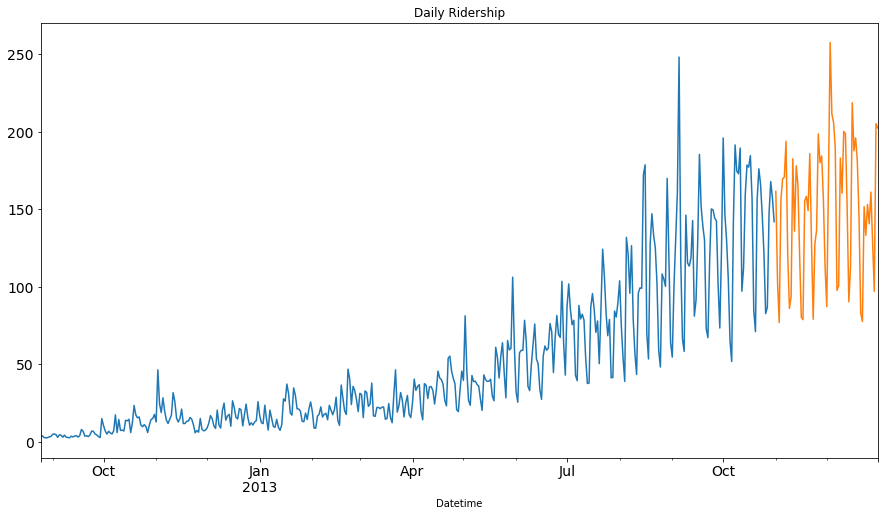

In [20]:
#Plotting data
train['Count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test['Count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()
#plt.savefig('time-series.png')

In [21]:
#Installing library(statsmodels): The library which we'll use to perform Time series forecasting is statsmodels. 

In [22]:
#Method 5 – Holt’s Linear Trend method
#If we use any of the above methods, it won’t take into account this trend. 
#Trend is the general pattern of prices that we observe over a period of time (increasing/descreasing trend).
#Although all previous (naive, simple avg, MA, simple exponential smoothing) can be applied to the trend as well but
#these methods doesnt work with long trends and these methods work under assuption. Like Naive method would 
#assume that trend between last two points is going to stay the same, or we could average all slopes 
#between all points to get an average trend, use a moving trend average or apply exponential smoothing.
#But we need a method that can map the trend accurately without any assumptions. 
#Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.
#Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. 
#Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

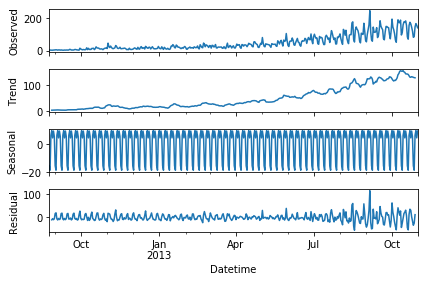

In [24]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['Count']).plot()
result = sm.tsa.stattools.adfuller(train['Count'])
plt.show()

In [ ]:
#When the trend increases or decreases linearly, additive equation is used whereas 
#when the trend increases of decreases exponentially, multiplicative equation is used.
#Practice shows that multiplicative is a more stable predictor, the additive method however is simpler to understand.

In [26]:
from statsmodels.tsa.api import Holt

In [27]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

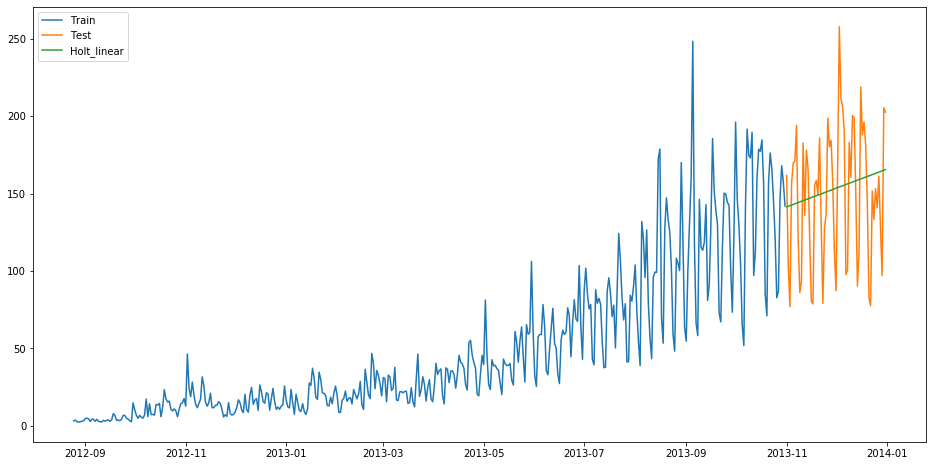

In [28]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [29]:
#alculate RMSE to check to accuracy of our model on test data set
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['Holt_linear']))
print(rms)

43.056259611507286


In [24]:
#We can see that this method maps the trend accurately and hence provides a better solution 
#when compared with above models. We can still tune the parameters to get even a better model.